In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

pd.set_option('display.multi_sparse', True)

In [2]:
confirmations = pd.DataFrame.from_csv("datasets/statements/confirmation.250d.csv", index_col=["method" , "sampling", "iteration"], tupleize_cols=True)

confirmations = confirmations.drop("pages",1)
confirmations = confirmations.drop("sentences",1)

print len(confirmations)

20000


In [3]:
confirmations.columns = pd.MultiIndex.from_product([["statements 0", "statements 1"],["control", "holes", "links"]])
# confirmations.reset_index(inplace=True)
# confirmations = confirmations.drop("iteration",1)
confirmations.head(10)

statements 0             statements 1            
                               control holes links      control holes links
method sampling iteration                                                  
cbow   10       0                    0     1     1            0     1   1.0
                1                    0     2     0            0     2   0.0
                2                    0     1     0            0     1   0.0
                3                    0     1     3            0     0   1.0
                4                    0     2     2            0     1   1.0
                5                    0     2     2            0     1   1.0
                6                    0     1     2            0     0   1.0
                7                    0     2     3            0     1   1.0
                8                    0     1     3            0     0   1.0
                9                    0     1     1            0     1   1.0

In [4]:
#confirmations.groupby(level=[0,1]).agg([np.mean, np.std])
statements_by_samplings = confirmations.groupby(level=[0,1])

statements_by_samplings.mean()

statements 0               statements 1              
                       control  holes  links      control  holes  links
method   sampling                                                      
cbow     10              0.003  1.664  1.835        0.003  0.891  0.762
         20              0.000  1.323  2.512        0.000  0.373  0.982
         30              0.000  1.402  2.955        0.000  0.444  1.057
         40              0.000  1.467  3.463        0.000  0.483  1.496
         50              0.000  1.467  3.534        0.000  0.492  1.711
         60              0.000  1.276  3.467        0.000  0.320  1.748
         70              0.000  1.052  3.336        0.000  0.161  1.779
         80              0.000  0.982  3.252        0.000  0.097  1.715
         90              0.000  1.177  3.264        0.000  0.207  1.817
         100             0.000  1.469  3.379        0.000  0.480  2.102
skipgram 10              0.008  1.557  2.437        0.008  0.892  1.186
         20              0.003  1.545  2.780        0.003  0.752  1.503
         30              0.002  1.542  2.383        0.002  0.857  1.513
         40              0.000  1.713  2.033        0.000  1.260  1.766
         50              0.000  1.733  1.889        0.000  1.536  2.056
         60              0.000  1.540  2.051        0.000  1.473  2.328
         70              0.000  1.448  2.151        0.000  1.389  2.478
         80              0.000  1.431  2.093        0.000  1.451  2.558
         90              0.000  1.460  1.918        0.000  1.526  2.484
         100             0.000  1.554  1.629        0.000  1.646  2.122

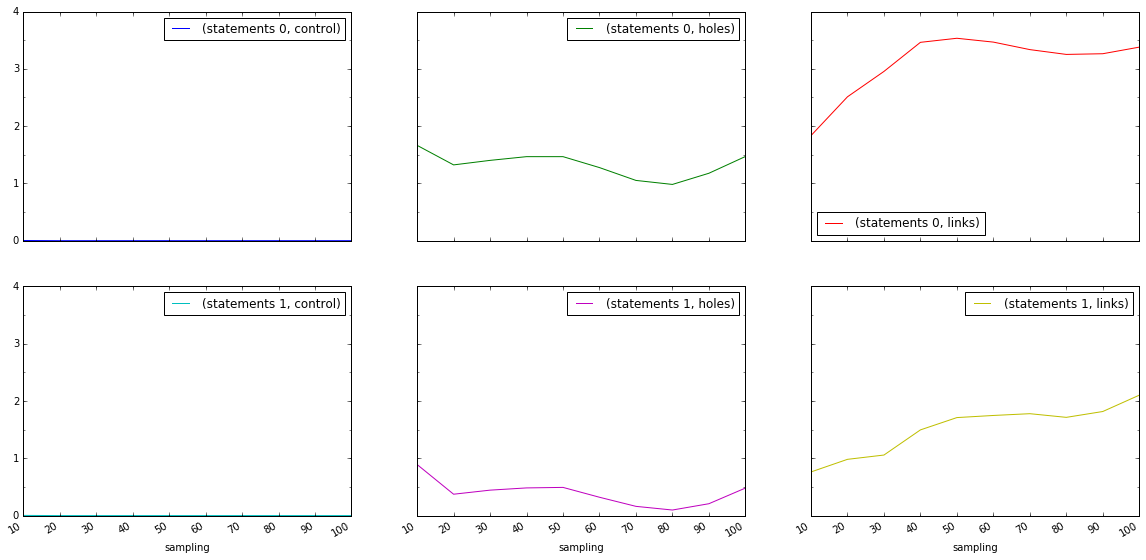

In [13]:
statements_by_samplings.mean().loc["cbow"].plot(kind="line", subplots=True, layout=(2,3), figsize=(20,10), sharey=True, yticks=[0,1,2,3,4]);

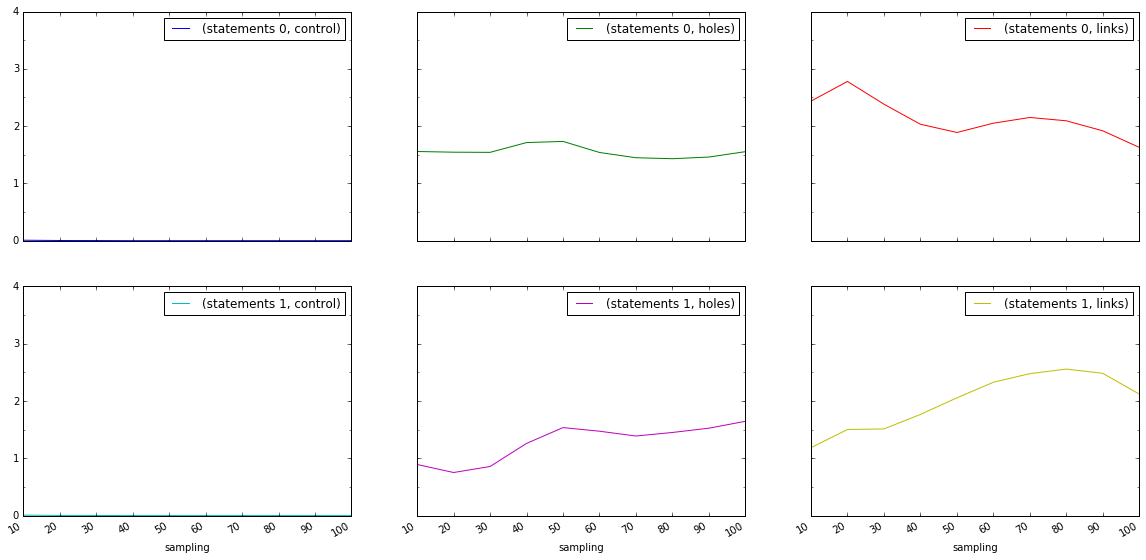

In [7]:
statements_by_samplings.mean().loc["skipgram"].plot(kind="line", subplots=True, layout=(2,3), figsize=(20,10), sharey=True, yticks=[0,1,2,3,4]);